<a href="https://colab.research.google.com/github/Hyun-ho-Lee/Python-Practice/blob/main/%EA%B2%B0%EC%B8%A1%EA%B0%92_%EA%B8%B0%EB%B3%B8%EA%B8%B008_22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

# for Box-Cox Transformation
from scipy import stats

# for min_max scaling
from mlxtend.preprocessing import minmax_scaling

# plotting modules
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import os 
from google.colab import drive
drive.mount('/content/drvie')
warnings.filterwarnings('ignore')

Mounted at /content/drvie


# Scaling vs Normalization : What's the different?

스케일링과 Normalization 둘의 차이점은 무엇인가? 

스케일링은 데이터의 범위를 조절 

Normalization은 데이터 분포의 형태를 변환

Scaling에서 예를들어 1 dollar 그리고 100 yen이 존재 둘의 가치의 차이는 확연하게 다르므로 조정이 필요함 따라서 둘의 비율을 맞춰서 다르게 해주는게 Scaling 이라고 보면됨 (SVM 이나 KNN에서 주로 사용됨) 



In [2]:
original_data = np.random.exponential(size=1000)

scaled_data = minmax_scaling(original_data , columns=[0])

In [3]:
original_data

array([1.66175995e+00, 3.78774674e-01, 1.82677952e+00, 5.20487893e-02,
       1.19976164e-01, 3.92411286e-02, 1.29051948e-01, 4.10210856e-01,
       1.93512090e+00, 1.28912353e+00, 1.86325502e-01, 1.36572776e+00,
       5.56870094e-01, 2.74262220e-01, 3.13160624e-01, 2.85539239e-01,
       1.66028090e+00, 5.58485670e-01, 3.83513008e-02, 1.55754047e+00,
       2.80885005e-01, 2.34887229e+00, 1.28864897e+00, 2.61346940e-01,
       1.49678134e+00, 2.04717897e-01, 5.04366941e-01, 2.01793442e+00,
       1.07090133e+00, 1.32644708e+00, 1.28701985e+00, 2.68724787e+00,
       4.63345553e-01, 9.44140861e-01, 3.71104574e-01, 1.82151444e-01,
       1.07709756e+00, 4.01532443e-01, 9.78245990e-02, 7.68277726e-01,
       2.34504714e-01, 2.87776578e-01, 1.00476644e+00, 2.13356025e+00,
       4.55532571e+00, 3.37001024e-01, 3.08718265e-02, 2.20043219e-01,
       2.21737360e-01, 7.02308863e-01, 1.52587655e+00, 2.38941890e-01,
       9.59151862e-01, 3.25111704e-01, 2.63417111e-02, 2.06944029e-01,
      

In [4]:
scaled_data

array([[1.86050986e-01],
       [4.23386904e-02],
       [2.04535487e-01],
       [5.74082133e-03],
       [1.33496374e-02],
       [4.30618418e-03],
       [1.43662522e-02],
       [4.58599825e-02],
       [2.16671236e-01],
       [1.44310496e-01],
       [2.07816913e-02],
       [1.52891241e-01],
       [6.22878685e-02],
       [3.06318337e-02],
       [3.49889991e-02],
       [3.18950176e-02],
       [1.85885313e-01],
       [6.24688357e-02],
       [4.20651103e-03],
       [1.74376948e-01],
       [3.13736783e-02],
       [2.63017180e-01],
       [1.44257338e-01],
       [2.91851417e-02],
       [1.67571075e-01],
       [2.28418968e-02],
       [5.64067810e-02],
       [2.25947510e-01],
       [1.19866557e-01],
       [1.48491256e-01],
       [1.44074854e-01],
       [3.00919978e-01],
       [5.18118117e-02],
       [1.05667611e-01],
       [4.14795319e-02],
       [2.03141384e-02],
       [1.20560622e-01],
       [4.48878789e-02],
       [1.08683523e-02],
       [8.59684803e-02],


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Scaled data')

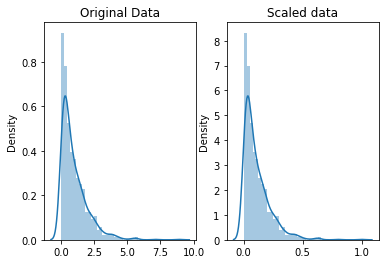

In [5]:
fig, ax = plt.subplots(1,2)
sns.distplot(original_data, ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(scaled_data, ax=ax[1])
ax[1].set_title("Scaled data")

Scaled 된 데이터를 확인해보면 데이터가 0~1 사이에 존재하는걸로 볼수있음 

In [8]:
normalized_data = stats.boxcox(original_data)
normalized_data

(array([ 5.42892901e-01, -8.58101346e-01,  6.52257669e-01, -2.06337250e+00,
        -1.63051684e+00, -2.18978014e+00, -1.58807257e+00, -7.95493215e-01,
         7.20138921e-01,  2.62524642e-01, -1.36163905e+00,  3.24649554e-01,
        -5.43093352e-01, -1.09877937e+00, -1.00234313e+00, -1.06983156e+00,
         5.41877034e-01, -5.40604034e-01, -2.19964383e+00,  4.69609934e-01,
        -1.08167443e+00,  9.56027587e-01,  2.62131360e-01, -1.13303604e+00,
         4.25196092e-01, -1.30004000e+00, -6.27069857e-01,  7.70152154e-01,
         6.91135871e-02,  2.93125236e-01,  2.60780461e-01,  1.12699409e+00,
        -6.97309603e-01, -5.70530196e-02, -8.73957863e-01, -1.37624098e+00,
         7.49908614e-02, -8.12411693e-01, -1.74513711e+00, -2.54783556e-01,
        -1.20845430e+00, -1.06418938e+00,  4.75805453e-03,  8.37499818e-01,
         1.85821071e+00, -9.47551727e-01, -2.29008815e+00, -1.25177093e+00,
        -1.24658940e+00, -3.37651428e-01,  4.46627484e-01, -1.19556097e+00,
        -4.1

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Normalized data')

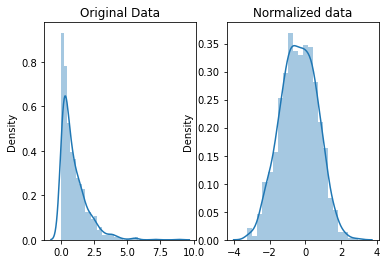

In [9]:
fig, ax=plt.subplots(1,2)
sns.distplot(original_data, ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(normalized_data[0], ax=ax[1])
ax[1].set_title("Normalized data")

# Weather Conditions in World War Two

케글 데이터 예제를 통해 Scaling 및 linear regression 실습


In [11]:
weather_data=pd.read_csv("/content/drvie/MyDrive/weather.csv")
location_data=pd.read_csv("/content/drvie/MyDrive/locations.csv")

In [13]:
weather_data.head()

,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,MO,DA,PRCP,DR,SPD,MAX,MIN,MEA,SNF,SND,FT,FB,FTI,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE
0,10001,1942-7-1,1.016,NaN,25.555556,22.222222,23.888889,0,NaN,42,7,1,0.04,NaN,NaN,78.0,72.0,75.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10001,1942-7-2,0,NaN,28.888889,21.666667,25.555556,0,NaN,42,7,2,0,NaN,NaN,84.0,71.0,78.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10001,1942-7-3,2.54,NaN,26.111111,22.222222,24.444444,0,NaN,42,7,3,0.1,NaN,NaN,79.0,72.0,76.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10001,1942-7-4,2.54,NaN,26.666667,22.222222,24.444444,0,NaN,42,7,4,0.1,NaN,NaN,80.0,72.0,76.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10001,1942-7-5,0,NaN,26.666667,21.666667,24.444444,0,NaN,42,7,5,0,NaN,NaN,80.0,71.0,76.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
location_data.head()

,WBAN,NAME,STATE/COUNTRY ID,LAT,LON,ELEV,Latitude,Longitude
0,33013,AIN EL,AL,3623N,00637E,611,36.383333,6.650000
1,33031,LA SENIA,AL,3537N,00037E,88,35.616667,0.583333
2,33023,MAISON BLANCHE,AL,3643N,00314E,23,36.716667,3.216667
3,33044,TELERGMA,AL,3607N,00621E,754,36.116667,6.416667
4,12001,TINDOUF,AL,2741N,00809W,443,27.683333,-8.083333


In [15]:
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119040 entries, 0 to 119039
Data columns (total 31 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   STA          119040 non-null  int64  
 1   Date         119040 non-null  object 
 2   Precip       119040 non-null  object 
 3   WindGustSpd  532 non-null     float64
 4   MaxTemp      119040 non-null  float64
 5   MinTemp      119040 non-null  float64
 6   MeanTemp     119040 non-null  float64
 7   Snowfall     117877 non-null  object 
 8   PoorWeather  34237 non-null   object 
 9   YR           119040 non-null  int64  
 10  MO           119040 non-null  int64  
 11  DA           119040 non-null  int64  
 12  PRCP         117108 non-null  object 
 13  DR           533 non-null     float64
 14  SPD          532 non-null     float64
 15  MAX          118566 non-null  float64
 16  MIN          118572 non-null  float64
 17  MEA          118542 non-null  float64
 18  SNF          117877 non-

In [17]:
weather_data.shape

(119040, 31)

In [18]:
weather_data.isnull().sum()

STA                 0
Date                0
Precip              0
WindGustSpd    118508
MaxTemp             0
MinTemp             0
MeanTemp            0
Snowfall         1163
PoorWeather     84803
YR                  0
MO                  0
DA                  0
PRCP             1932
DR             118507
SPD            118508
MAX               474
MIN               468
MEA               498
SNF              1163
SND            113477
FT             119040
FB             119040
FTI            119040
ITH            119040
PGT            118515
TSHDSBRSGF      84803
SD3            119040
RHX            119040
RHN            119040
RVG            119040
WTE            119040
dtype: int64

In [19]:
weather_data.columns.values

array(['STA', 'Date', 'Precip', 'WindGustSpd', 'MaxTemp', 'MinTemp',
       'MeanTemp', 'Snowfall', 'PoorWeather', 'YR', 'MO', 'DA', 'PRCP',
       'DR', 'SPD', 'MAX', 'MIN', 'MEA', 'SNF', 'SND', 'FT', 'FB', 'FTI',
       'ITH', 'PGT', 'TSHDSBRSGF', 'SD3', 'RHX', 'RHN', 'RVG', 'WTE'],
      dtype=object)

In [20]:
drop_data = ['Precip','STA','Date','WindGustSpd','Snowfall','PoorWeather', 'PRCP', 'DR', 'SPD', 'SNF', 'SND', 'FT', 'FB', 'FTI', 'ITH', 'PGT', 'TSHDSBRSGF', 'SD3', 'RHX', 'RHN', 'RVG', 'WTE']
weather_data.drop(drop_data,inplace=True,axis=1)

In [21]:
weather_data

,MaxTemp,MinTemp,MeanTemp,YR,MO,DA,MAX,MIN,MEA
0,25.555556,22.222222,23.888889,42,7,1,78.0,72.0,75.0
1,28.888889,21.666667,25.555556,42,7,2,84.0,71.0,78.0
2,26.111111,22.222222,24.444444,42,7,3,79.0,72.0,76.0
3,26.666667,22.222222,24.444444,42,7,4,80.0,72.0,76.0
4,26.666667,21.666667,24.444444,42,7,5,80.0,71.0,76.0
...,...,...,...,...,...,...,...,...,...
119035,28.333333,18.333333,23.333333,45,12,27,83.0,65.0,74.0
119036,29.444444,18.333333,23.888889,45,12,28,85.0,65.0,75.0
119037,28.333333,18.333333,23.333333,45,12,29,83.0,65.0,74.0
119038,28.333333,18.333333,23.333333,45,12,30,83.0,65.0,74.0


In [22]:
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119040 entries, 0 to 119039
Data columns (total 9 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   MaxTemp   119040 non-null  float64
 1   MinTemp   119040 non-null  float64
 2   MeanTemp  119040 non-null  float64
 3   YR        119040 non-null  int64  
 4   MO        119040 non-null  int64  
 5   DA        119040 non-null  int64  
 6   MAX       118566 non-null  float64
 7   MIN       118572 non-null  float64
 8   MEA       118542 non-null  float64
dtypes: float64(6), int64(3)
memory usage: 8.2 MB


In [23]:
null = ['MAX','MIN','MEA','MaxTemp','MinTemp','MeanTemp']

for i in null :
    weather_data = weather_data[~weather_data[i].isna()]

In [24]:
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118540 entries, 0 to 119039
Data columns (total 9 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   MaxTemp   118540 non-null  float64
 1   MinTemp   118540 non-null  float64
 2   MeanTemp  118540 non-null  float64
 3   YR        118540 non-null  int64  
 4   MO        118540 non-null  int64  
 5   DA        118540 non-null  int64  
 6   MAX       118540 non-null  float64
 7   MIN       118540 non-null  float64
 8   MEA       118540 non-null  float64
dtypes: float64(6), int64(3)
memory usage: 9.0 MB


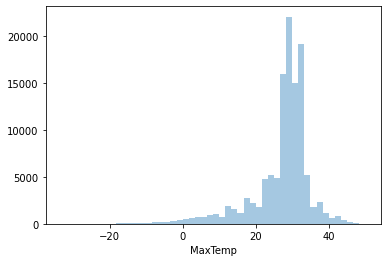

In [26]:
sns.distplot(weather_data['MaxTemp'],kde = False)